In [39]:
import requests
import json
import csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

graphql   : 


Nous pouvons filtrer notre recherche de restaurants en fonction de la ville et la catégorie de l'établissement(facultatif), ces catégories sont disponibles à cette page : https://docs.developer.yelp.com/docs/resources-categories

Valeur de la variable d'environnement MY_API_KEY :  
eWtpdzo8O7Of1Qhnq7Of6PfdsCno6fnJFq-36UY9jm-LYbCLcT84vVxQu7jxT6jXw61V-h7SPOv4t-z4W6hehMMQkfFXZye2FHaBTP7KdUSTsAHwji1fes8UZlsraHYx

Client ID: 
c4_dvyIvEkkAthQE_BhzlQ

import requests

url = "https://api.yelp.com/v3/businesses/business_id_or_alias/reviews?limit=20&sort_by=yelp_sort"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

In [40]:
MY_API_KEY="eWtpdzo8O7Of1Qhnq7Of6PfdsCno6fnJFq-36UY9jm-LYbCLcT84vVxQu7jxT6jXw61V-h7SPOv4t-z4W6hehMMQkfFXZye2FHaBTP7KdUSTsAHwji1fes8UZlsraHYx"

In [ ]:
def get_businesses(location, api_key, categories=None, term="restaurants"):
    """
    Cette fonction interroge l'API Yelp pour obtenir une liste d'établissements en fonction des critères spécifiés.
    
    Args:
        location (str) : Lieu où chercher les établissements.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        categories (str, optionnel) : Catégories d'établissements à rechercher.
        term (str, optionnel) : Terme de recherche. Par défaut, il s'agit de "restaurants".

    Returns:
        list : Liste de dictionnaires où chaque dictionnaire représente les détails d'un établissement.
    """
    headers = {"Authorization": "Bearer %s" % api_key}
    url = "https://api.yelp.com/v3/businesses/search"
    data = {}
    offset = 0
    while len(data) < 200:
        params = {
            "limit": 50,
            "location": location,
            "term": term,
            "offset": offset,
            "categories": categories,  
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            businesses = response.json()["businesses"]
            print(f"Received {len(businesses)} businesses from Yelp API.")  
            for business in businesses:
                if business["id"] not in data:
                    data[business["id"]] = business
        elif response.status_code == 400:
            print("400 Bad Request")
            break
        print(f"Currently, {len(data)} unique businesses collected.")  
        offset += 50
    print(f"Total unique businesses collected: {len(data)}.") 
    return list(data.values())  



def get_reviews(business_id, api_key):
    """
    Cette fonction récupère les avis d'un établissement spécifique à partir de l'API Yelp.
    
    Args:
        business_id (str) : ID de l'établissement pour lequel récupérer les avis.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        
    Returns:
        list : Liste de dictionnaires où chaque dictionnaire représente un avis pour l'établissement.
    """
    headers = {"Authorization": "Bearer %s" % api_key}
    url = f"https://api.yelp.com/v3/businesses/{business_id}/reviews"
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()["reviews"]
    except:
        print(f"Failed to get reviews for business id {business_id}")
    return []


def collect_and_write_data(location, api_key, categories):
    """
    Cette fonction collecte les données des établissements et de leurs avis à partir de l'API Yelp 
    et les écrit dans un fichier CSV.
    
    Args:
        location (str) : Lieu où chercher les établissements.
        api_key (str) : Clé d'API Yelp pour authentifier la requête.
        categories (str) : Catégories d'établissements à rechercher.
    """
    businesses = get_businesses(location, api_key, categories)
    with open("yelp_data.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(
            [
                "business_id",
                "name",
                "rating",
                "review_count",
                "category",
                "address",
                "city",
                "zip_code",
                "review_text",
                "review_rating",
            ]
        )
        for business in businesses:
            business_id = business["id"]
            reviews = get_reviews(business_id, api_key)
            for review in reviews:
                writer.writerow(
                    [
                        business_id,
                        business["name"],
                        business["rating"],
                        business["review_count"],
                        ", ".join([cat["title"] for cat in business["categories"]]),
                        business["location"]["address1"],
                        business["location"]["city"],
                        business["location"]["zip_code"],
                        review["text"],
                        review["rating"],
                    ]
                )
            
api_key = os.getenv("MY_API_KEY")
location = "Paris"
categories = "french"
collect_and_write_data(location, api_key, categories)

400 Bad Request
Total unique businesses collected: 0.


In [42]:
df = pd.read_csv("yelp_data.csv")

In [43]:
df

,business_id,name,rating,review_count,category,address,city,zip_code,review_text,review_rating


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_id    0 non-null      object
 1   name           0 non-null      object
 2   rating         0 non-null      object
 3   review_count   0 non-null      object
 4   category       0 non-null      object
 5   address        0 non-null      object
 6   city           0 non-null      object
 7   zip_code       0 non-null      object
 8   review_text    0 non-null      object
 9   review_rating  0 non-null      object
dtypes: object(10)
memory usage: 132.0+ bytes


In [45]:
df.nunique()

business_id      0
name             0
rating           0
review_count     0
category         0
address          0
city             0
zip_code         0
review_text      0
review_rating    0
dtype: int64

Text(0.5, 1.0, 'Distribution des notes des restaurants sélectionnés')

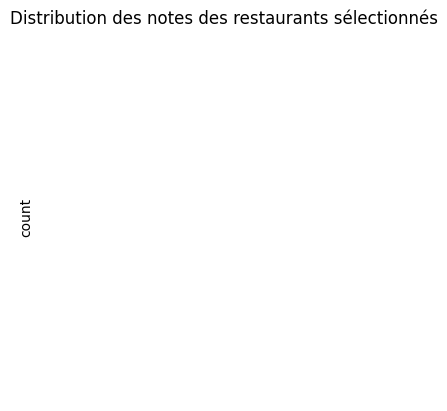

In [46]:
df.rating.value_counts().plot.pie()
plt.title("Distribution des notes des restaurants sélectionnés")